In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import squarify as sq
import plotly.io as pio
pio.templates
import seaborn as sns
import resample as rs

In [2]:
df = pd.read_csv('dataset/funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29-Jan-15,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-Jan-15,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-Jan-15,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-Jan-15,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [3]:
funding = df[['Date dd/mm/yyyy',	'Startup Name',	'Industry Vertical', 'SubVertical', 'Investors Name',
              	'InvestmentnType', 'Amount in USD',	'Remarks']].copy()

In [4]:
funding['Date dd/mm/yyyy'] = pd.to_datetime(funding['Date dd/mm/yyyy'])
funding['Year'] = funding['Date dd/mm/yyyy'].dt.year
funding['Month'] = funding['Date dd/mm/yyyy'].dt.month
funding['Day'] = funding['Date dd/mm/yyyy'].dt.day
funding['Date dd/mm/yyyy'].replace(np.nan, '01/01/2020', inplace=True)

In [5]:
df['Date dd/mm/yyyy']

0       09-Jan-20
1       13-Jan-20
2       09-Jan-20
3       02-Jan-20
4       02-Jan-20
          ...    
3039    29-Jan-15
3040    29-Jan-15
3041    30-Jan-15
3042    30-Jan-15
3043    31-Jan-15
Name: Date dd/mm/yyyy, Length: 3044, dtype: object

In [6]:
# Delete remarks column
df.drop('Remarks', axis=1, inplace=True)

In [7]:
# Startup Cleaning and Preprocessing repeated Company Names
df['Startup Name'].replace('Ola Cabs', 'Ola', inplace=True)
df['Startup Name'].replace('Flipkart.com', 'Flipkart', inplace=True)
df['Startup Name'].replace('Oyo Rooms', 'Oyo', inplace=True)
df['Startup Name'].replace('.com', '', inplace=True)
df['Startup Name'].replace('Paytm Marketplace', 'Paytm', inplace=True)
df['Startup Name'].replace('.in', '', inplace=True)

In [8]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [9]:
def clean_Industry_Vertical(name):
    if name =='ecommerce':
        return 'E-commerce'
    elif name =='eCommerce':
        return 'E-commerce'
    elif name =='eCommece':
        return 'E-commerce'
    elif name =='ECommerce':
        return 'E-commerce'
    elif name =='E-Commerce':
        return 'E-commerce'
    elif name =='E-Commerce & M-Commerce platform':
        return 'M-commerce platform'
    elif name =='Last Mile Transportation':
        return 'Transportation'
    elif name =='Transportation & Logistics Platform':
        return 'Transportation'
    elif name =='Fintech':
        return 'FinTech'
    elif name =='Logistics Tech':
        return 'Logistics'
    elif name == 'Health and wellness':
        return 'Health and Wellness'
    elif name == 'Food and Beverage':
        return 'Food and Beverages'
    elif name == 'Saas':
        return 'SaaS'
    elif name == 'SaaS, Ecommerce':
        return 'SaaS'
    elif name == 'healthcare':
        return 'Healthcare'
    elif name == 'Edtech':
        return 'EdTech'
    elif name == 'Ecommerce':
        return 'E-commerce'
    elif name == 'Food-Tech':
        return 'Food Tech'
    elif name == 'Healthcare\\\\nService provider':
        return 'Healthcare Service provider'
    elif name == 'Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service':
        return 'Hyperlocal Grocery Delivery Service'
    elif name == 'Mobile Growth Hacking\\\\nPlatform':
        return 'Mobile Growth Hacking Platform'
    elif name == 'Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform':
        return 'Location based Nightlife recommendation Platform'
    elif name == 'Luxury goods\\\\xc2\\\\xa0 Shopping Platform':
        return 'Luxury goods Shopping Platform'
    elif name == 'Chain of Tea Caf\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s':
        return 'Chain of Tea Cafe'
    elif name == 'Online home d\\\\xc3\\\\xa9cor marketplace':
        return 'Online home decor marketplace'
    elif name =='Online Home D\\\\xc3\\\\xa9cor':
        return 'Online hom'
    elif name =='Online home decor marketplace':
        return 'decor marketplace' 
    elif name =='Online Furnishing\\\\neCommerce':
        return ''
    elif name =='Interactive\\\\xc2\\\\xa0 How-To Guides':
        return 'Interactive'
    elif name =='OnDemand\\\\nMobile Handyman Services':
        return 'Handyman Services'
    


    return name

In [10]:
df['Industry Vertical'] = df['Industry Vertical'].apply(clean_Industry_Vertical)

In [11]:
import re
def clean_Amount_column(Amount):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    if isinstance(Amount, str):
            if Amount == 'undisclosed' or Amount == 'Undisclosed':
                return np.nan
            if Amount == 'unknown':
                return np.nan
            Amount = emoji_pattern.sub(r'', Amount)
            Amount = Amount.replace(',', '')
            Amount = Amount.replace('+', '')
            Amount = Amount.replace('\\\\xc2\\\\xa', '').replace('0N/A','')
            Amount = Amount.replace('.', '')
            Amount = Amount.replace('\\\\xc2\\\\xa0', '')
            Amount = Amount.replace('\\\\xc2\\\\xa6', '')
            Amount = Amount.replace('\\\\xc2\\\\xa7', '')
            Amount = Amount.replace('\\\\xc2\\\\xa8', '')
            Amount = Amount.replace('\\\\xc2\\\\xa9', '')
            Amount = Amount.replace('\\\\xc2\\\\xaa', '')
            Amount = Amount.replace('\\\\xc2\\\\xab', '')
            Amount = Amount.replace('\\\\xc2\\\\xac', '')
            Amount = Amount.replace('\\\\xc2\\\\xad', '')
            Amount = Amount.replace('\\\\xc2\\\\xae', '')
            Amount = Amount.replace('\\\\xc2\\\\xaf', '')
            Amount = Amount.replace('\\\\xc2\\\\xb', '')
            Amount = Amount.replace('\\\\xc2\\\\xb0', '')
            Amount = Amount.replace('\\\\xc2\\\\xb1', '')
            Amount = Amount.replace('\\\\xc2\\\\xb2', '')
            Amount = Amount.replace('\\\\xc2\\\\xb3', '')
            Amount = Amount.replace('\\\\xc2\\\\xb4', '')
            Amount = Amount.replace('\\\\xc2\\\\xb5', '')
            Amount = Amount.replace('\\\\xc2\\\\xb6', '')
            Amount = Amount.replace('\\\\xc2\\\\xb7', '')
            Amount = Amount.replace('\\\\xc2\\\\xb8', '')
            Amount = Amount.replace('\\\\xc2\\\\xb9', '')
            Amount = Amount.replace('\\\\xc2\\\\xba', '')
            Amount = Amount.replace('\\\\xc2\\\\xbb', '')
            Amount = Amount.replace('\\\\xc2\\\\xbc', '')
            Amount = Amount.replace('\\\\xc2\\\\xbd', '')
            Amount = Amount.replace('\\\\xc2\\\\xbe', '')
            Amount = Amount.replace('\\\\xc2\\\\xbf', '')
            Amount = Amount.replace('\\\\xc2\\\\xc',  '')
            Amount = Amount.replace('\\\\xc2\\\\xc0', '')
            Amount = Amount.replace('\\\\xc2\\\\xc1', '')
            Amount = Amount.replace('\\\\xc2\\\\xc2', '')
            Amount = Amount.replace('\\\\xc2\\\\xc3', '')
            Amount = Amount.replace('\\\\xc2\\\\xc4', '')
            

            if Amount:
                Amount = float(Amount)
                return float(Amount)            
            # print(Amount, type(Amount))
    return np.nan

In [12]:
df['Amount in USD'] = df['Amount in USD'].apply(clean_Amount_column)

In [13]:
# polarity
df['Industry Vertical'].value_counts()

Consumer Internet                       941
Technology                              478
E-commerce                              300
Healthcare                               71
Finance                                  62
                                       ... 
Ride Sharing platform                     1
Online P2P lending marketplace            1
B2B marketplace for industrial goods      1
Cloud Based Collaboration platform        1
Online Travel Marketplace                 1
Name: Industry Vertical, Length: 804, dtype: int64

In [14]:
# nan values in Industry Vertical
df['Industry Vertical'].isna().sum()

171

In [15]:
# only take the top 50 industry vertical
top_industry_vertical = df['Industry Vertical'].value_counts().index[:15]
top_industry_vertical

Index(['Consumer Internet', 'Technology', 'E-commerce', 'Healthcare',
       'Finance', 'Logistics', 'Education', 'Food & Beverage', 'Ed-Tech',
       'FinTech', 'Food and Beverages', 'IT', 'Transportation', 'Real Estate',
       'Health and Wellness'],
      dtype='object')

In [16]:
# records of top 50 industry vertical
df_top_industry_vertical = df[df['Industry Vertical'].isin(top_industry_vertical)].copy()
df_top_industry_vertical


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,6,13-Jan-20,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0
7,8,12-Dec-19,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0
...,...,...,...,...,...,...,...,...,...
2817,2818,07-Apr-15,LogiNext,Logistics,NaN,Mumbai,"Ajit Surana, Sanjay Mehta",Seed Funding,NaN
2818,2819,08-Apr-15,FirstCry.com,E-commerce,NaN,Pune,"Silicon Valley Ventures, NEA Ventures, Valiant...",Private Equity,10000000.0
2825,2826,09-Apr-15,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,NaN
2830,2831,13-Apr-15,Nayi Disha,Ed-Tech,NaN,New Delhi,"Ajay Relan,",Seed Funding,300000.0


In [17]:
IV=df['Industry Vertical']
label15=np.arange(0,15)
top=df["Industry Vertical"].value_counts().head(15)
top

Consumer Internet      941
Technology             478
E-commerce             300
Healthcare              71
Finance                 62
Logistics               37
Education               24
Food & Beverage         23
Ed-Tech                 14
FinTech                 10
Food and Beverages       9
IT                       8
Transportation           7
Real Estate              6
Health and Wellness      6
Name: Industry Vertical, dtype: int64

In [18]:
df['Amount in USD'].dtype

dtype('float64')

In [19]:
def _check_dataframe_all_leaves(df):
    df_sorted = df.sort_values(by=list(df.columns))
    null_mask = df_sorted.isnull()
    df_sorted = df_sorted.astype(str)
    df_sorted[null_mask] = np.nan
    return df_sorted

In [20]:
top_InvestmentnType = df['InvestmentnType'].value_counts().index[:5]
top_InvestmentnType

Index(['Private Equity', 'Seed Funding', 'Seed/ Angel Funding',
       'Seed / Angel Funding', 'Seed\\nFunding'],
      dtype='object')

In [21]:
def clean_city_names(name):
    if name == '\\\\xc2\\\\xa0Noida':
        return 'Noida'
    elif name == '\\\\xc2\\\\xa0Bangalore':
        return 'Bangalore'
    elif name == '\\\\xc2\\\\xa0Gurgaon':
        return 'Gurugram'
    elif name == '\\\\xc2\\\\xa0New Delhi':
        return 'New Delhi'
    elif name == '\\\\xc2\\\\xa0Mumbai':
        return 'Mumbai'
    elif name == '\\\\xc2\\\\xa0Pune':
        return 'Pune'
    elif name == '\\\\xc2\\\\xa0Hyderabad':
        return 'Hyderabad'
    elif name == '\\\\xc2\\\\xa0Chennai':
        return 'Chennai'
    elif name == '\\\\xc2\\\\xa0Ahmedabad':
        return 'Ahmedabad'
    elif name == '\\\\xc2\\\\xa0Jaipur':
        return 'Jaipur'
    elif name == '\\\\xc2\\\\xa0Kolkata':
        return 'Kolkata'
    elif name == '\\\\xc2\\\\xa0Chandigarh':
        return 'Chandigarh'
    elif name == '\\\\xc2\\\\xa0Vadodara':
        return 'Vadodara'
    elif name == '\\\\xc2\\\\xa0Bhubaneshwar':
        return 'Bhubaneshwar'
    elif name == '\\\\xc2\\\\xa0Indore':
        return 'Indore'
    elif name == 'Mumbai/Bengaluru':
        return 'Mumbai'
    elif name == 'India/US':
        return 'Jaipur'
    elif name == 'India/Singapore':
        return 'Patna'
    elif name == 'Bangalore/ Bangkok':
        return 'Bangalore'
    elif name == 'SFO / Bangalore':
        return 'Chandigarh'
    elif name == 'Seattle / Bangalore':
        return 'Prayagraj'
    elif name == 'Pune/Seattle':
        return 'Pune'
    elif name == 'Pune / Dubai':
        return 'Visakhapatnam'
    elif name == 'Bangalore / SFO':
        return 'Agra'
    elif name == 'New Delhi / US':
        return 'Bhopal'
    elif name == 'Mumbai / UK':
        return 'Nashik'
    elif name == 'Hyderabad/USA':
        return 'Hyderabad'
    elif name == 'Bangalore / Palo Alto':
        return 'Madurai'
    elif name == 'Mumbai / NY':
        return 'Varanasi'  
    elif name == 'USA/India':
        return 'Kochi'
    elif name == 'Goa/Hyderabad':
        return 'Goa'
    elif name == 'Noida / Singapore':
        return 'Kanpur'
    elif name == 'Pune / US':
        return 'Nagpur'
    elif name == 'Chennai/ Singapore':
        return 'Gurugram'
    elif name == 'Pune / Singapore':
        return 'Ghaziabad'
    elif name == 'Bangalore / San Mateo': 
        return 'Faridabad'
    elif name == 'New York/ India':
        return 'Meerut'
    elif name == 'US/India':
        return 'Ranchi'
    elif name == 'Gurgaon / SFO':
        return 'Kerala'
    elif name == 'Bangalore / USA':
        return 'Lucknow'
    elif name == 'New Delhi/ Houston':
        return 'Rajkot'
    elif name == 'Mumbai / Global':
        return 'srinagar'
    elif name == 'India / US':
        return 'Gwalior'
    elif name == 'New Delhi / California':
        return 'Madurai'
    elif name == 'Dallas / Hyderabad':
        return 'Solapur'
    

    
    # more
    return name

In [22]:
df['City  Location'] = df['City  Location'].apply(clean_city_names)

In [23]:
df['City  Location' ].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Bhopal', 'Bengaluru and Gurugram', 'Patna', 'Jaipur',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Hubli', 'Kerala', 'Kozhikode',
       'US', 'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'London',
       'Pr

In [24]:
top_city_location = df['City  Location'].value_counts().index[:15]
top_city_location

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Bengaluru', 'Pune',
       'Hyderabad', 'Chennai', 'Noida', 'Gurugram', 'Ahmedabad', 'Delhi',
       'Jaipur', 'Kolkata', 'Indore'],
      dtype='object')

In [ ]:
df.to_csv('cleaned_funding.csv', index=False)

# Distribution between Industry Vertical and Amount in USD
# Total Graphs 13

In [79]:
df[:15]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09-Jan-20,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13-Jan-20,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09-Jan-20,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02-Jan-20,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02-Jan-20,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
5,6,13-Jan-20,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0
6,7,10-Jan-20,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
7,8,12-Dec-19,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.0
8,9,06-Dec-19,CarDekho,E-commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0
9,10,03-Dec-19,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,50000000.0


In [78]:
# pie chart size of each sector
fig = px.pie(df[:15], values='Amount in USD', names='Industry Vertical', title='Amount in USD by Industry Vertical',
            color='Industry Vertical',
            labels={'Industry Vertical':'Industry Vertical'},
            width=1000, height=600, template='none',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', hole=0.4, marker=dict(line=dict(color='#000000', width=2)),
                   opacity=0.8, rotation=45, textfont_size=15, texttemplate='%{label}<br>%{value:$,.2f}' and '%{percent}')
fig.show()

In [26]:
df_top_industry_vertical.sort_values(by='Amount in USD', ascending=False, inplace=True)
fig = px.histogram(df[:20],
                    x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True,width=1000, height=600,
                title="Amount in USD by Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, template='plotly_white',
                color_discrete_sequence=px.colors.qualitative.Dark24, nbins=100, )
fig.show()

In [27]:
# box plot
fig = px.box(df[21:1000], y="Amount in USD", x="Industry Vertical", color= "Industry Vertical", hover_name="Startup Name", log_y=True, points=False,
             width=1000, height=600, title="Amount in USD by Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
             color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly_white')
fig.show()

In [28]:
# violin plot
fig = px.violin(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_x=True, box=True,
             width=1100, height=600, title="Amount in USD by Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}
             ,color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly_white')
fig.show()

In [29]:
# 3d scatter plot
fig = px.scatter_3d(df_top_industry_vertical, x="Amount in USD", y="Industry Vertical", z="Startup Name", color="Industry Vertical", hover_name="Startup Name", log_x=True, size_max=60,
                title="Amount in USD by Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                width=1000, height=600, color_discrete_sequence=px.colors.qualitative.Dark24, template='plotly_white')
fig.show()

In [30]:
fig = px.scatter_polar(df[:70], r="Amount in USD", theta="Industry Vertical", color="Industry Vertical", hover_name="Startup Name", log_r=True, size_max=60,
                title="Amount in USD by Industry Vertical", labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},  width=1000, height=600, symbol="Industry Vertical",
                color_discrete_sequence=px.colors.qualitative.Dark24, template='none')
fig.show()

In [31]:
# line chart 
fig = px.line(df[:1700], x="Industry Vertical", y="Amount in USD",  color="Industry Vertical", title='Amount in USD by Industry Vertical',
              line_group="Industry Vertical", hover_name="Startup Name", log_y=True, width=1000, height=600, template='plotly',
              labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, color_discrete_sequence=px.colors.qualitative.Dark24,
              )
fig.show()

In [32]:
fig = px.histogram(df_top_industry_vertical, x="Industry Vertical", y="Amount in USD", color="Industry Vertical",
                  title='Amount in USD by Industry Vertical', hover_name="Startup Name", log_y=True, width=1000, height=600, template='plotly',
                   labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, color_discrete_sequence=px.colors.qualitative.Dark24,
                     )
fig.show()

In [33]:
fig = px.box(df_top_industry_vertical, x="Industry Vertical", y="Amount in USD", color="Industry Vertical",
             title='Amount in USD by Industry Vertical', hover_name="Startup Name", log_y=True, width=1000, height=600, template='plotly',
                labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, color_discrete_sequence=px.colors.qualitative.Dark24,
                 
            )
fig.show()

In [34]:
fig = px.density_contour(df[:50], x="Amount in USD", y="Industry Vertical", color="Industry Vertical", marginal_x="rug", marginal_y="histogram",
                         hover_data=df.columns,  width=1100, height=600,
                        labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, color_discrete_sequence=px.colors.qualitative.Dark24,
                         template='plotly_white', nbinsx=150, nbinsy=150, title='Amount in USD by Industry Vertical')
fig.show()

In [35]:
fig = px.density_contour(df[:25], x="Amount in USD", y="Industry Vertical", color="Industry Vertical", marginal_x="rug", marginal_y="histogram",
                         hover_data=df.columns, title='Amount in USD by Industry Vertical', width=1100, height=600, template='plotly_white')
fig.show()

In [36]:
fig = px.density_heatmap(df[:25], x="Amount in USD", y="Industry Vertical", marginal_x="rug", marginal_y="histogram",
                            hover_data=df.columns, title='Amount in USD by Industry Vertical', width=1000, height=600,
                            template='seaborn')
fig.show()

In [37]:
fig = px.funnel(df[:30], x="Industry Vertical", y="Amount in USD", color="Industry Vertical",title="Amount in USD by Industry Vertical",  width=1100, height=600,
                labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, template='ggplot2',
                color_discrete_sequence=px.colors.qualitative.Dark24, )
fig.show()

# Distribution between City Location and Amount in USD
# Total Graphs 11

In [38]:
fig = px.area(df[:50], x="Amount in USD", y="City  Location", color="City  Location",
            template='plotly_white', width=1000, height=600, hover_data=df.columns, title='Amount in USD by City  Location',
            labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name'},
            pattern_shape="Startup Name", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [39]:
fig = px.bar(df[:30], x="City  Location", y="Amount in USD", color="City  Location", text="Amount in USD",
             color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
             labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'},
             title='Amount in USD by City  Location'
             )
fig.show()

In [40]:
fig = px.bar(df[400:420], y="City  Location", x="Amount in USD", color="Amount in USD", text="Amount in USD",
             color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
             labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'},
             title='Amount in USD by City  Location'
             )
fig.show()

In [41]:
fig = px.bar(df[:55], x='Amount in USD', y='City  Location', color='City  Location', title='Amount in USD by City  Location',
                color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
                labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'})

fig.show()

In [42]:
fig = px.line_polar(df[:100], theta="Amount in USD", r="City  Location", color="Industry Vertical", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_white", title='Amount in USD by City  Location',
                    height=600, width=1000, hover_data=df.columns, labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD'})
fig.show()

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

In [43]:
fig = px.bar_polar(df[:228], r="City  Location", theta="Amount in USD", color="City  Location",
                    template="none", title='Amount in USD by City Location ', height=600, width=1000,
                     labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"},
                         
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [44]:
fig = px.funnel(df[:50], y="City  Location", x="Amount in USD", color="City  Location",title="Amount in USD by City Location",  width=1000, height=600,
                labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, template='ggplot2',
                color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [45]:
fig = px.density_heatmap(df[:35], y="Amount in USD", x="City  Location", marginal_x="rug", marginal_y="histogram",
                             title='Amount in USD by City Location', width=1000, height=600,
                            template='seaborn')
fig.show()

In [46]:
fig = px.density_contour(df[:35], x="Amount in USD", y="City  Location", color="City  Location", marginal_x="rug", marginal_y="histogram",
                         hover_data=df.columns, title='Amount in USD by City Location', width=1000, height=600, template='plotly_white')
fig.show()

In [47]:
fig = px.pie(df[:50], values='Amount in USD', names='City  Location', title='Amount in USD by City Location', width=800, height=600,
             color='City  Location', labels={'City  Location':'City  Location'}, template='none', color_discrete_sequence=px.colors.sequential.Plasma_r
        )

fig.show()

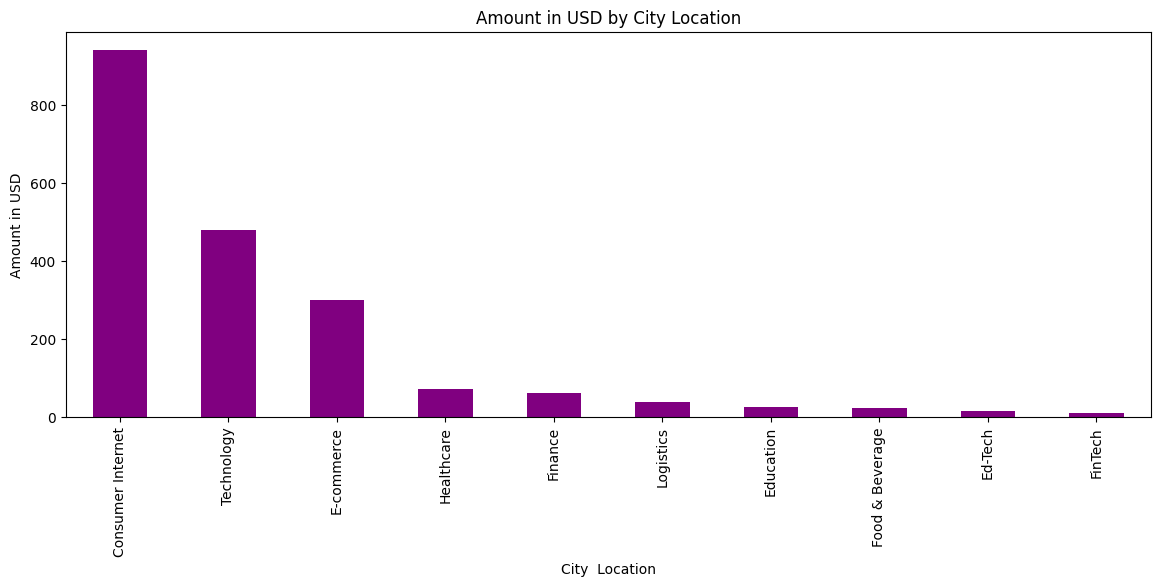

In [48]:
plt.figure(figsize=(15,15))
iv=df['Industry Vertical'].value_counts().head(10)
iv.plot.bar(df, color='purple',figsize=(14,5))

plt.title('Amount in USD by City Location')
plt.ylabel('Amount in USD')
plt.xlabel('City  Location')
plt.show()

# Distribution between Startup Name and Amount in USD
# Total Graphs 8

In [49]:
fig = px.area(df[:45], x="Amount in USD", y="Startup Name", color="Industry Vertical",
            template='plotly_white', width=1000, height=600, hover_data=df.columns, title='Amount in USD by Startup Name',
            labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location', 'Startup Name':'Startup Name'},
            pattern_shape="Startup Name", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [50]:
fig = px.bar(df[400:425], x="Startup Name", y="Amount in USD", color="Industry Vertical", text="Amount in USD",
             color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
             labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'},
             title='Amount in USD by Startup Name'
             )
fig.show()

In [51]:
fig = px.bar(df[:30], y='Amount in USD', x='Startup Name', color='Industry Vertical', title='Amount in USD by Startup Name',
                color_discrete_sequence=px.colors.sequential.Plasma_r, template='plotly_white', width=1000, height=600, hover_data=df.columns,
                labels={'Amount in USD':'Amount in USD', 'City  Location':'City  Location'})

fig.show()

In [52]:
fig = px.line_polar(df[:750], theta="Amount in USD", r="Startup Name",color='Startup Name', symbol="Startup Name", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_white", title='Amount in USD by Startup Name',
                    height=600, width=1000, hover_data=df.columns, labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD'})
fig.show()

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\abhia\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a futu

In [53]:
fig = px.scatter_polar(df[:200], r="Startup Name", theta="Amount in USD", color='Startup Name', template="plotly_white", title='Amount in USD by Startup Name',
                        color_discrete_sequence=px.colors.sequential.Plasma_r, width=1000, height=600, hover_data=df.columns, labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD'},
                        color_continuous_scale=px.colors.sequential.Plasma_r, color_continuous_midpoint=np.average(df['Amount in USD'], weights=df['Amount in USD']),
                        symbol="Startup Name", )
fig.show()

In [54]:
fig = px.pie(df[:20], values='Amount in USD', names='Startup Name', title='Amount in USD by Startup Name', width=1000, height=600,
             color='Startup Name', labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD', 
                                           'Startup Name':'Startup Name', 'Industry Vertical':'Industry Vertical', },
             template='none', color_discrete_sequence=px.colors.sequential.Plasma_r
        )

fig.show()

In [55]:
fig = px.density_contour(df[:20], x="Amount in USD", y="Startup Name", color="Startup Name", marginal_x="rug", marginal_y="histogram",
                         hover_data=df.columns, title='Amount in USD by Startup Name', width=1000, height=600, template='plotly_white',
                         labels={'City  Location':'City  Location', 'Amount in USD':'Amount in USD',
                                 'Startup Name':'Startup Name', 'Industry Vertical':'Industry Vertical' })
fig.show()

In [56]:
fig = px.funnel(df[:25], y="Startup Name", x="Amount in USD", color="Startup Name",title="Amount in USD by City Location",  width=1000, height=600,
                labels={"Amount in USD": "Amount in USD", "Industry Vertical": "Industry Vertical"}, template='ggplot2',
                color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

# Distribution between Investors Name and Amount in USD
# Total Graphs 8

In [57]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [62]:
fig = px.bar(df[:50], x="Startup Name", y="InvestmentnType", color="InvestmentnType", text="Amount in USD", width=1000, height=600)
fig.show()

In [69]:
fig = px.treemap(df[400:500], path=['Startup Name', 'InvestmentnType'], values='Amount in USD', title='Amount in USD by Startup Name and InvestmentnType', width=1000, height=600)
fig.show()

In [70]:
fig = px.pie(df[10:25], values='Amount in USD', names='InvestmentnType', title='Amount in USD by InvestmentnType', width=1000, height=600,
                color='InvestmentnType')
fig.show()

In [73]:
fig = px.histogram(df[:50], x="Amount in USD", y="InvestmentnType", color="InvestmentnType", marginal="rug", hover_data=df.columns,
                     title='Amount in USD by InvestmentnType', width=1000, height=600, template='plotly_white')
fig.show()